### Lesson 1. Activity: Practice Plotting Tabular Data Using Matplotlib and Pandas in Open Source Python
[website of the exercise](https://www.earthdatascience.org/courses/intro-to-earth-data-science/scientific-data-structures-python/pandas-dataframes/)

-------------------

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import earthpy as et

# Add seaborn general plot specifications
sns.set(font_scale=1.5, style="whitegrid")
plt.rcParams["figure.figsize"] = 10,8

In [2]:
# URL for .csv with avg monthly precip data
avg_monthly_precip_url = "https://ndownloader.figshare.com/files/12710618"

# Download file from URL
# NOTE - this csv file should download to your home directory: `~/earth-analytics/earthpy-downloads`
et.data.get_data(url=avg_monthly_precip_url)

# Set your working directory
os.chdir(os.path.join(et.io.HOME,
                      "earth-analytics",
                      "data"))
# Downloading from https://ndownloader.figshare.com/files/12710618

In [3]:
precip_path = os.path.join("earthpy-downloads",
                           "avg-precip-months-seasons.csv")

precip_data = pd.read_csv(precip_path)
precip_data

,months,precip,seasons
0,Jan,0.70,Winter
1,Feb,0.75,Winter
2,Mar,1.85,Spring
3,Apr,2.93,Spring
4,May,3.05,Spring
5,June,2.02,Summer
6,July,1.93,Summer
7,Aug,1.62,Summer
8,Sept,1.84,Fall
9,Oct,1.31,Fall


#### Challenge 1: Plot Precipitation Data

Use the code below to open up a precipitation dataset that contains average monthly rainfall in inches. Practice your plotting skills. To begin, do the following:

    1. Read in the .csv file called avg-precip-months-seasons.csv.
    2. Create a basic plot using .plot()
    3. Set an appropriate xlabel, ylabel, and plot title.
    4. Use the linestyle parameter to modify the line style to something other than solid.
    5. Change the color to something other than the default blue.
    6. Add a marker parameter to the ax.plot. What happens when you change the marker in a line plot?

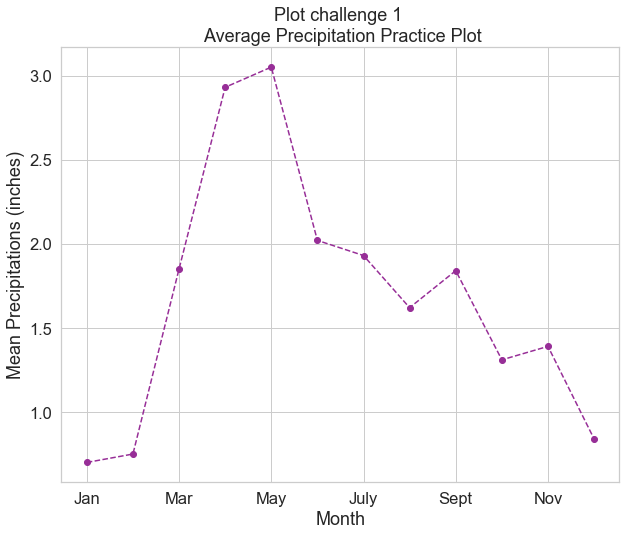

In [4]:
n = precip_data.plot(x= "months",
        y="precip",
        #I copied the color of the original plot using https://www.colorzilla.com/
        color= "#972E97",
        linestyle='dashed',
        marker='o')
plt.xlabel("Month")
plt.ylabel("Mean Precipitations (inches)")
plt.legend([],[], frameon=False)
n.set(title="Plot challenge 1 \n Average Precipitation Practice Plot")
plt.show()


-----------------

#### Challenge 2: Bar Plot of Precipitation Data

Using the same data you used above, create a bar plot of precipitation data. Once again do the following:

1. Read in the .csv file called avg-precip-months-seasons.csv.
2. Create a bar plot using ax.bar()
3. Set an appropriate xlabel, ylabel, and plot title.
4. Use the edgecolor and color parameters to modify the colors of your plot to something other than blue.

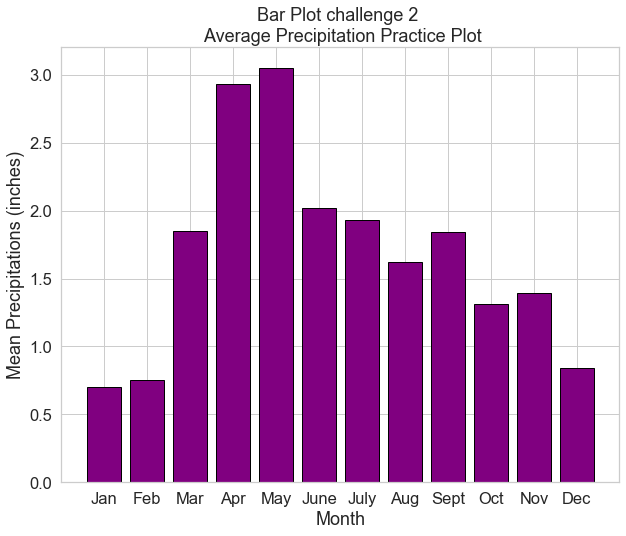

In [5]:
f, ax = plt.subplots()
ax.bar(precip_data.months,
        precip_data.precip,
        color= "#800080",
        edgecolor="black")
plt.xlabel("Month")
plt.ylabel("Mean Precipitations (inches)")
ax.set(title="Bar Plot challenge 2 \n Average Precipitation Practice Plot")
plt.show()

--------------------

### Challenge 3: Figure with Two Subplots of Precipitation Data

Above you created two plots:

    1. a line plot of precipitation data with each point highlighted using a marker.
    2. a bar plot of precipitation data.

Here, create a single figure that contains two subplots stacked on top of each other.

    1. The first should be your line plot.
    2. The second should be your scatter plot.

For the figure do the following:

    1. Add an overal title to your figure using plt.suptitle()
    2. Use plt.tight_layout() to make space between the two plots so that the titles and labels do nor overlap

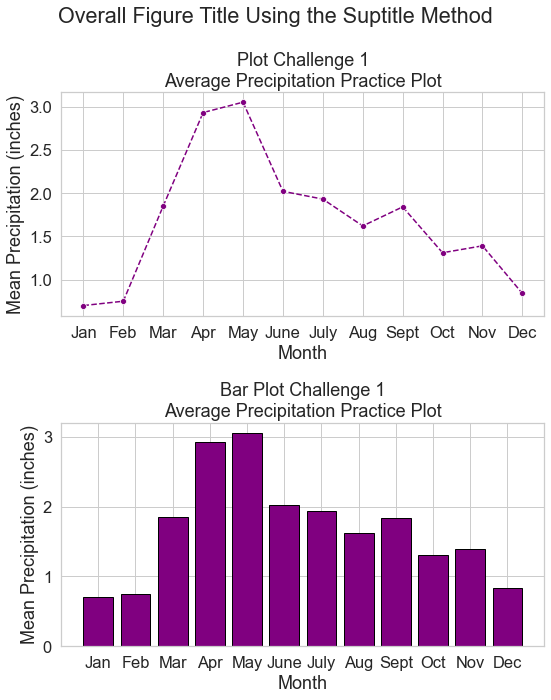

In [6]:
f, axes = plt.subplots(2,1, figsize=(8, 10))

plt.suptitle("Overall Figure Title Using the Suptitle Method")
plt.subplot(2, 1,1)
plot1= sns.lineplot(data=precip_data, 
             x= "months", 
             y="precip",
             color= "#800080",
            ls="--",
            marker='o')
plot1.set(ylabel="Mean Precipitation (inches)",
       xlabel="Month",
       title="Plot Challenge 1\nAverage Precipitation Practice Plot")

axes[1].bar(precip_data.months,
        precip_data.precip,
        color= "#800080",
        edgecolor="black")
axes[1].set(ylabel="Mean Precipitation (inches)",
       xlabel="Month",
       title="Bar Plot Challenge 1\nAverage Precipitation Practice Plot")
plt.tight_layout()
plt.show()

-----

### Bonus Challenge 4: Plot Grouped Data

There are differents ways to go about plotting grouped data with a legend using pandas. Below you will walk through an approach to plot your precip data by season using:

    1.matplotlib
    2.and a grouped pandas dataframe

To achieve this plot, you will do the following:

    1.Create a for loop which groups for your pandas dataframe
    2.Create a figure as you would normally do using fig, ax = plt.subplots()
    3.Add a legend to your plot using plt.legend()

In each iteration of the for loop, you will specify the label (which is the group by object - in this case the seasons column). Your code will look something likee the code below:

    for label, df in precip_data.groupby("seasons"):
    ax.plot(df.months,
            df.precip,
            "o",
            # The label is the season or the group by object in this case
            label=label)
            


In [7]:
colors = {"Winter": "lightgrey",
          "Spring": "green",
          "Summer": "darkgreen",
          "Fall": "brown"}


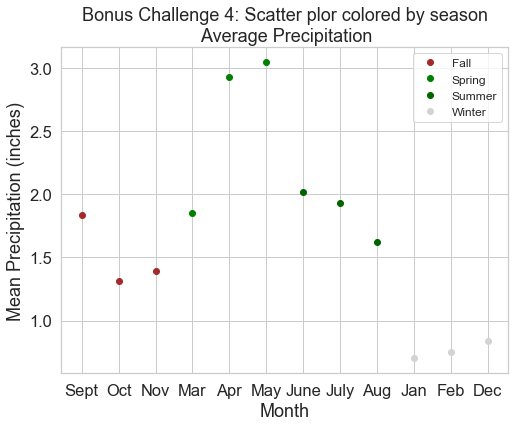

In [8]:
# Print each grouped data
fig, ax = plt.subplots(figsize=(8,6))
for label, df in precip_data.groupby("seasons"):
    ax.plot(df.months, 
            df.precip,
            label=label,
            color=colors[label],
            ls=" ",
            marker='o'),
    plt.legend(frameon=True, fancybox=True, prop={"size":12},fontsize=12);
    ax.set(ylabel="Mean Precipitation (inches)",
            xlabel="Month",
            title="Bonus Challenge 4: Scatter plor colored by season\n Average Precipitation")
